# <center>Prediction using Supervised ML</center>

## Problem Statement
### Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
*  You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?


In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Reading the Data

In [30]:
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Step 2 - Getting info about the Data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [33]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [34]:
df.duplicated().sum()

0

# Step 3 - Data Preprocessing

In [35]:
x = df.iloc[:,0:-1].values  #Predictors
y = df.iloc[:,1].values #Target

# Step 4 - Data Visualization

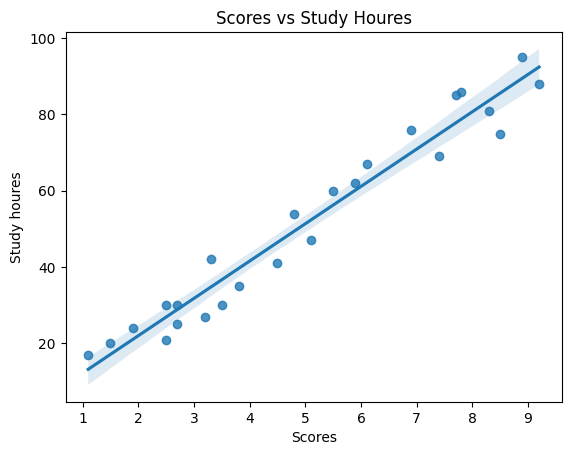

In [36]:
sns.regplot(x = df['Hours'], y = df['Scores'],data = df)
plt.title('Scores vs Study Houres')
plt.xlabel('Scores')
plt.ylabel('Study houres')
plt.show()

# Step 5 -  Model Traning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print(x.shape, x_train.shape, x_test.shape)

(25, 1) (20, 1) (5, 1)


In [39]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)

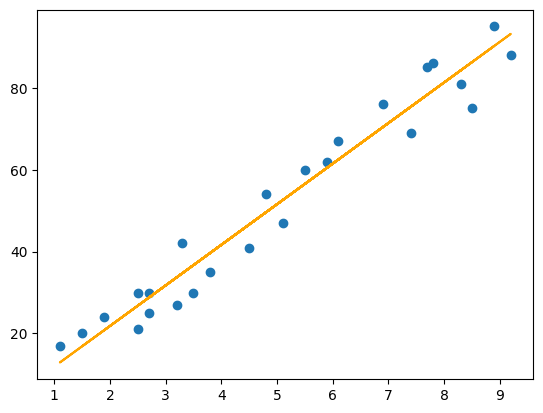

In [40]:
line = lr.coef_*x + lr.intercept_

plt.scatter(x, y)
plt.plot(x, line, color = 'orange')
plt.show()

# Making Predictions

In [41]:
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [42]:
df  = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the predicted score if a student for 9.25 hrs per day?

In [43]:
per_day = lr.predict([[9.25]])
print('predicted marks for a student studying for 9.25 hrs/day : ',per_day)

predicted marks for a student studying for 9.25 hrs/day :  [93.69173249]


In [44]:
acc = lr.score(x_train,y_train)*100
print('Accuracy of the Traning Data:',acc)

Accuracy of the Traning Data: 95.15510725211553


In [45]:
acc1 = lr.score(x_test,y_test)*100
print('Accuracy of the Test Data:',acc1)

Accuracy of the Test Data: 94.54906892105355


In [46]:
print('Mean_squred_error : ',metrics.mean_squared_error(y_test,predict))

Mean_squred_error :  21.598769307217406


In [47]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test,predict))

Mean absolute error: 4.183859899002975


In [48]:
print('R^2',metrics.r2_score(y_test, y_pred))

R^2 0.9454906892105355
